In [ ]:
# colabÌôòÍ≤ΩÏö©
# !apt-get update

# !apt-get install g++ openjdk-8-jdk python-dev python3-dev

# !pip3 install JPype1-py3

# !pip3 install konlpy
 
# !JAVA_HOME = /Library/Java/JavaVirtualMachines/zulu-15.jdk/Contents/Home

In [134]:
# Ìå®ÌÇ§ÏßÄ ÏûÑÌè¨Ìä∏
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import konlpy
from konlpy.tag import Okt

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [135]:
# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞ 
df = pd.read_csv('./dataset/ÌôçÎåÄ_ÎßõÏßë_Î¶¨Î∑∞_Îç∞Ïù¥ÌÑ∞_ver5.csv')

In [136]:
df.head(10)

Unnamed: 0 name  average_rating    user  user_rating  \
0           0  ÌõÑÍ≥ÑÎèô             4.5     ÌíÄÎÇ¥Ïùå          5.0   
1           1  ÌõÑÍ≥ÑÎèô             4.5      „Öá„Öá          5.0   
2           2  ÌõÑÍ≥ÑÎèô             4.5      ÌïëÍµ¨          5.0   
3           3  ÌõÑÍ≥ÑÎèô             4.5      :·¥Ö          3.0   
4           4  ÌõÑÍ≥ÑÎèô             4.5     Vin          5.0   
5           5  ÌõÑÍ≥ÑÎèô             4.5     ÏÜêÎØºÏòÅ          5.0   
6           6  ÌõÑÍ≥ÑÎèô             4.5  Ïû•ÏäêÎû≠Í∞ÄÏù¥Îìú          1.0   
7           7  ÌõÑÍ≥ÑÎèô             4.5     Ïù¥Ïö∞ÏßÑ          5.0   
8           8  ÌõÑÍ≥ÑÎèô             4.5     Ï†ïÏ∞∞Î≥ë          4.0   
9           9  ÌõÑÍ≥ÑÎèô             4.5     Ïø†ÏßëÏÇ¨          5.0   

                                             comment  \
0                                                NaN   
1                                         ‚ù§Ô∏è‚ù§Ô∏è‚ù§Ô∏è‚ù§Ô∏è‚ù§Ô∏è   
2                                           Ïò§Îûò Ìï¥Ï£ºÏÑ∏Ïöîüôè   
3  Ïõ®Ïù¥ÌåÖÌï¥ÏÑú Î®πÏùÑ ÎßõÏùÄ ÏïÑÎãàÏóêÏöî‚Ä¶ Îã≠Î≥¥ÏåàÏùÄ Î≥¥ÌÜµÏù¥ÏóàÍ≥† ÎπÑÎπîÍµ≠ÏàòÎùºÍ≥† Ìï¥ÏÑú ÎãπÏó∞Ìûà Íµ≠Î¨º ...   
4       ÏôÄ Ïó¨Í∏∏ Ïôú Ïù¥Ï†úÏïåÏïòÏ£†! ÎÑàÎ¨¥ÎßõÏûàÍ≥† Î∞òÏ∞¨ ÌïòÎÇòÌïòÎÇò Îã§ ÎßõÏûàÎÑ§Ïöî!! ÏûêÏ£º Í∞àÍ≤åÏöî!   
5  Ïò§ÎäòÏùò Î©îÎâ¥ ÎÑàÎ¨¥ Ï¢ãÏïÑÏöî. Ïñ¥Ï©ú Í∞ñÍ∞ÄÏßÄ Îã≠ÏöîÎ¶¨Î•º Í∑∏Î†áÍ≤å ÏûòÌïòÏãúÏ£†?!! Ïù¥Îü∞ Î¶¨Î∑∞ Ïûò...   
6                                  Ïó¨Í∏∞ÏÑú Î∞•Î®πÍ≥† ÎëòÎã§ Ïû•ÏóºÍ±∏Î¶º;;   
7  ÏµúÏï† ÏãùÎãπÏßÑÏßú Îã§ ÎßõÏûàÍ≥† Í∞ÄÍ≤©Ïù¥ ÏóÑÏ≤≠ Ï∞©Ìï®Ïò§ÎäòÏùò Î©îÎâ¥ÎùºÍ≥† Îß§Ïùº ÏÉàÎ°úÏö¥ Î©îÎâ¥Í∞Ä Ï§ÄÎπÑÎêò...   
8  Îã§ÏùåÎ∂ÄÌÑ∞ ÏÇ¨Ïû•Îãò ÍπÄÏπòÎ≥∂ÏùåÎ∞•ÌïòÏßÄÎßàÏÑ∏Ïöî. „Ö† „Öú ÎùºÎ©¥Îßå ÌïòÏÑ∏Ïöî!ÌïòÏã§Í∫ºÎ©¥ ÏßÑÏßú Îî¥Í±∞ÎßêÍ≥† ...   
9                           Ïù¥Î†áÍ≤å ÎßõÏûàÏñ¥ÎèÑ ÎêòÎÇò Ìï† Ï†ïÎèÑÎ°ú ÎßõÏûàÏñ¥Ïöî„Öé„Öé   

                                      url  target  
0  https://place.map.kakao.com/1183957472       1  
1  https://place.map.kakao.com/1183957472       1  
2  https://place.map.kakao.com/1183957472       1  
3  https://place.map.kakao.com/1183957472       0  
4  https://place.map.kakao.com/1183957472       1  
5  https://place.map.kakao.com/1183957472       1  
6  https://place.map.kakao.com/1183957472       0  
7  https://place.map.kakao.com/1183957472       1  
8  https://place.map.kakao.com/1183957472       1  
9  https://place.map.kakao.com/1183957472       1

In [137]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3130 entries, 0 to 3129
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      3130 non-null   int64  
 1   name            3130 non-null   object 
 2   average_rating  3130 non-null   float64
 3   user            3127 non-null   object 
 4   user_rating     3130 non-null   float64
 5   comment         2529 non-null   object 
 6   url             3130 non-null   object 
 7   target          3130 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 195.8+ KB


In [138]:
df.duplicated(['comment'])

0       False
1       False
2       False
3       False
4       False
        ...  
3125     True
3126     True
3127     True
3128     True
3129    False
Length: 3130, dtype: bool

In [139]:
df.drop_duplicates(['comment'])

Unnamed: 0   name  average_rating  user  user_rating  \
0              0    ÌõÑÍ≥ÑÎèô             4.5   ÌíÄÎÇ¥Ïùå          5.0   
1              1    ÌõÑÍ≥ÑÎèô             4.5    „Öá„Öá          5.0   
2              2    ÌõÑÍ≥ÑÎèô             4.5    ÌïëÍµ¨          5.0   
3              3    ÌõÑÍ≥ÑÎèô             4.5    :·¥Ö          3.0   
4              4    ÌõÑÍ≥ÑÎèô             4.5   Vin          5.0   
...          ...    ...             ...   ...          ...   
3120        3120  ÌòºÍ∞ÄÏ∏†ÌôçÎåÄ             2.9    Ï°∞Ïóê          5.0   
3122        3122  ÌòºÍ∞ÄÏ∏†ÌôçÎåÄ             2.9  maya          1.0   
3123        3123  ÌòºÍ∞ÄÏ∏†ÌôçÎåÄ             2.9    Ïñ¥Ï©ú          2.0   
3124        3124  ÌòºÍ∞ÄÏ∏†ÌôçÎåÄ             2.9   Ïù¥Ï†ïÌõà          5.0   
3129        3129  ÌòºÍ∞ÄÏ∏†ÌôçÎåÄ             2.9  myks          4.0   

                                                comment  \
0                                                   NaN   
1                                            ‚ù§Ô∏è‚ù§Ô∏è‚ù§Ô∏è‚ù§Ô∏è‚ù§Ô∏è   
2                                              Ïò§Îûò Ìï¥Ï£ºÏÑ∏Ïöîüôè   
3     Ïõ®Ïù¥ÌåÖÌï¥ÏÑú Î®πÏùÑ ÎßõÏùÄ ÏïÑÎãàÏóêÏöî‚Ä¶ Îã≠Î≥¥ÏåàÏùÄ Î≥¥ÌÜµÏù¥ÏóàÍ≥† ÎπÑÎπîÍµ≠ÏàòÎùºÍ≥† Ìï¥ÏÑú ÎãπÏó∞Ìûà Íµ≠Î¨º ...   
4          ÏôÄ Ïó¨Í∏∏ Ïôú Ïù¥Ï†úÏïåÏïòÏ£†! ÎÑàÎ¨¥ÎßõÏûàÍ≥† Î∞òÏ∞¨ ÌïòÎÇòÌïòÎÇò Îã§ ÎßõÏûàÎÑ§Ïöî!! ÏûêÏ£º Í∞àÍ≤åÏöî!   
...                                                 ...   
3120  ÏùåÏãùÏù¥ Í∞ÄÍ≤©ÎåÄÎπÑ ÏñëÎèÑ ÎßéÍ≥† ÎßõÏûàÎäî Í≥≥ÏûÖÎãàÎã§!!!Î∂ÑÏúÑÍ∏∞Îûë ÏßÅÏõêÎì§Ïùò Î∞òÏùëÏù¥ Ï§ëÏöîÌïòÏã† Î∂Ñ...   
3122  Ïó¨Í∏∞ ÏïåÎ∞îÎì§Ïù¥ ÏÑ§Ï≥êÎåÄÎäîÍ≤å ÏïÑÎãàÎùºÎ©¥ Î∞©ÏÜ° ÌÉîÏóàÎã§Í≥† Ïù¥Î¶¨ Î¶¨Î∑∞Í∞Ä ÎßéÏùÄÍ≤ÉÏù∏Í∞ÄÏöî? ÏßÑÏã¨ Ìèâ...   
3123        Ïùå. Ïõ®Ïù¥ÌåÖ Ïã≠Ïò§Î∂ÑÌñàÎäîÎç∞ Ï∞®Í≤å ÏãùÏùÄ ÏπòÏ¶àÍ∞ÄÏä§Í∞Ä ÎÇòÏôîÎã§. ÏôïÌòºÍ∞ÄÏ∏†ÎèÑ Í∑∏ÎÉ• ÏèòÏèò.   
3124      Í∞ÄÍ≤©ÏùÄ ÏñëÏóêÎπÑÌï¥ÏÑú Ïã∏Í±∞ÎÇò Ï†ÅÎãπÌïòÎã§Í≥† Î¥ÖÎãàÎã§. Í∏∞Î≥∏ ÏÉùÎèàÍπåÏä§Îäî Ï†ïÎßê ÏñëÏù¥ ÎßéÏä¥ÎãàÎã§.   
3129                                           20160515   

                                         url  target  
0     https://place.map.kakao.com/1183957472       1  
1     https://place.map.kakao.com/1183957472       1  
2     https://place.map.kakao.com/1183957472       1  
3     https://place.map.kakao.com/1183957472       0  
4     https://place.map.kakao.com/1183957472       1  
...                                      ...     ...  
3120    https://place.map.kakao.com/22895023       1  
3122    https://place.map.kakao.com/22895023       0  
3123    https://place.map.kakao.com/22895023       0  
3124    https://place.map.kakao.com/22895023       1  
3129    https://place.map.kakao.com/22895023       1  

[2465 rows x 8 columns]

<AxesSubplot:>

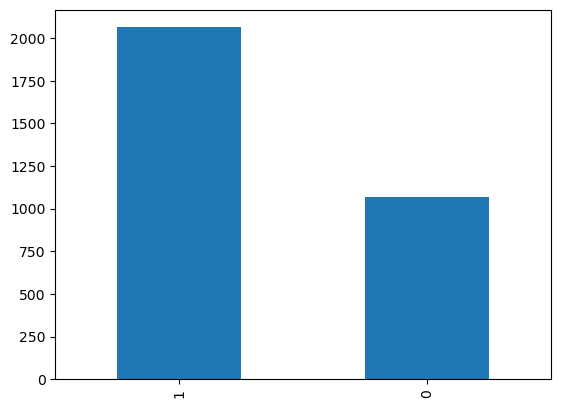

In [140]:
df['target'].value_counts().plot(kind = 'bar')

## Í≤∞Ï∏°Ïπò ÌôïÏù∏ Î∞è Ï†úÍ±∞

In [141]:
df.isnull().sum()

Unnamed: 0          0
name                0
average_rating      0
user                3
user_rating         0
comment           601
url                 0
target              0
dtype: int64

In [142]:
df = df.dropna()
df.isnull().sum()

Unnamed: 0        0
name              0
average_rating    0
user              0
user_rating       0
comment           0
url               0
target            0
dtype: int64

## Îç∞Ïù¥ÌÑ∞ Ï†ïÏ†ú

In [143]:
df['comment'] = df['comment'].str.replace("[^„Ñ±-Ìïò-„Ö£Í∞Ä-Ìû£ ]", '')

df.head(10)

/var/folders/m3/9rlp04l902592zqcywkn5ppm0000gn/T/ipykernel_39606/736958544.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['comment'] = df['comment'].str.replace("[^„Ñ±-Ìïò-„Ö£Í∞Ä-Ìû£ ]", '')


Unnamed: 0 name  average_rating        user  user_rating  \
1            1  ÌõÑÍ≥ÑÎèô             4.5          „Öá„Öá          5.0   
2            2  ÌõÑÍ≥ÑÎèô             4.5          ÌïëÍµ¨          5.0   
3            3  ÌõÑÍ≥ÑÎèô             4.5          :·¥Ö          3.0   
4            4  ÌõÑÍ≥ÑÎèô             4.5         Vin          5.0   
5            5  ÌõÑÍ≥ÑÎèô             4.5         ÏÜêÎØºÏòÅ          5.0   
6            6  ÌõÑÍ≥ÑÎèô             4.5      Ïû•ÏäêÎû≠Í∞ÄÏù¥Îìú          1.0   
7            7  ÌõÑÍ≥ÑÎèô             4.5         Ïù¥Ïö∞ÏßÑ          5.0   
8            8  ÌõÑÍ≥ÑÎèô             4.5         Ï†ïÏ∞∞Î≥ë          4.0   
9            9  ÌõÑÍ≥ÑÎèô             4.5         Ïø†ÏßëÏÇ¨          5.0   
10          10  ÌõÑÍ≥ÑÎèô             4.5  Sungjin Ji          5.0   

                                              comment  \
1                                                       
2                                             Ïò§Îûò Ìï¥Ï£ºÏÑ∏Ïöî   
3   Ïõ®Ïù¥ÌåÖÌï¥ÏÑú Î®πÏùÑ ÎßõÏùÄ ÏïÑÎãàÏóêÏöî Îã≠Î≥¥ÏåàÏùÄ Î≥¥ÌÜµÏù¥ÏóàÍ≥† ÎπÑÎπîÍµ≠ÏàòÎùºÍ≥† Ìï¥ÏÑú ÎãπÏó∞Ìûà Íµ≠Î¨º ÏóÜ...   
4            ÏôÄ Ïó¨Í∏∏ Ïôú Ïù¥Ï†úÏïåÏïòÏ£† ÎÑàÎ¨¥ÎßõÏûàÍ≥† Î∞òÏ∞¨ ÌïòÎÇòÌïòÎÇò Îã§ ÎßõÏûàÎÑ§Ïöî ÏûêÏ£º Í∞àÍ≤åÏöî   
5   Ïò§ÎäòÏùò Î©îÎâ¥ ÎÑàÎ¨¥ Ï¢ãÏïÑÏöî Ïñ¥Ï©ú Í∞ñÍ∞ÄÏßÄ Îã≠ÏöîÎ¶¨Î•º Í∑∏Î†áÍ≤å ÏûòÌïòÏãúÏ£† Ïù¥Îü∞ Î¶¨Î∑∞ Ïûò Ïïà ÎÇ®...   
6                                     Ïó¨Í∏∞ÏÑú Î∞•Î®πÍ≥† ÎëòÎã§ Ïû•ÏóºÍ±∏Î¶º   
7   ÏµúÏï† ÏãùÎãπÏßÑÏßú Îã§ ÎßõÏûàÍ≥† Í∞ÄÍ≤©Ïù¥ ÏóÑÏ≤≠ Ï∞©Ìï®Ïò§ÎäòÏùò Î©îÎâ¥ÎùºÍ≥† Îß§Ïùº ÏÉàÎ°úÏö¥ Î©îÎâ¥Í∞Ä Ï§ÄÎπÑÎêò...   
8   Îã§ÏùåÎ∂ÄÌÑ∞ ÏÇ¨Ïû•Îãò ÍπÄÏπòÎ≥∂ÏùåÎ∞•ÌïòÏßÄÎßàÏÑ∏Ïöî „Ö† „Öú ÎùºÎ©¥Îßå ÌïòÏÑ∏ÏöîÌïòÏã§Í∫ºÎ©¥ ÏßÑÏßú Îî¥Í±∞ÎßêÍ≥† ÍπÄÏπò...   
9                            Ïù¥Î†áÍ≤å ÎßõÏûàÏñ¥ÎèÑ ÎêòÎÇò Ìï† Ï†ïÎèÑÎ°ú ÎßõÏûàÏñ¥Ïöî„Öé„Öé   
10  Ïò§ÎäòÏùò Î©îÎâ¥Îã≠ Ïπ¥Î†àÎùºÏù¥Ïä§ÎØ∏Îãà Ïñ¥Î¨µ Ïö∞ÎèôÎëò Îã§ ÎßõÏûàÎã§ Ïπ¥Î†àÎäî ÏùºÎ≥∏Ïãù ÏïÑÎãàÍ≥† Ïö∞Î¶¨Ïãù Ïö∞...   

                                       url  target  
1   https://place.map.kakao.com/1183957472       1  
2   https://place.map.kakao.com/1183957472       1  
3   https://place.map.kakao.com/1183957472       0  
4   https://place.map.kakao.com/1183957472       1  
5   https://place.map.kakao.com/1183957472       1  
6   https://place.map.kakao.com/1183957472       0  
7   https://place.map.kakao.com/1183957472       1  
8   https://place.map.kakao.com/1183957472       1  
9   https://place.map.kakao.com/1183957472       1  
10  https://place.map.kakao.com/1183957472       1

In [144]:
df['comment'] = df['comment'].replace('', np.nan)
len(df)

2527

In [145]:
df.isnull().sum()

Unnamed: 0        0
name              0
average_rating    0
user              0
user_rating       0
comment           5
url               0
target            0
dtype: int64

In [146]:
 # Ï†ïÍ∑úÌëúÌòÑÏãùÏúºÎ°ú Ïù∏Ìï¥ Í≥µÎ∞±Ïù¥ Îêú Î¶¨Î∑∞ Ìñâ Ï†úÍ±∞
df = df.dropna()
len(df)

2522

In [147]:
df.head(10)

Unnamed: 0 name  average_rating        user  user_rating  \
2            2  ÌõÑÍ≥ÑÎèô             4.5          ÌïëÍµ¨          5.0   
3            3  ÌõÑÍ≥ÑÎèô             4.5          :·¥Ö          3.0   
4            4  ÌõÑÍ≥ÑÎèô             4.5         Vin          5.0   
5            5  ÌõÑÍ≥ÑÎèô             4.5         ÏÜêÎØºÏòÅ          5.0   
6            6  ÌõÑÍ≥ÑÎèô             4.5      Ïû•ÏäêÎû≠Í∞ÄÏù¥Îìú          1.0   
7            7  ÌõÑÍ≥ÑÎèô             4.5         Ïù¥Ïö∞ÏßÑ          5.0   
8            8  ÌõÑÍ≥ÑÎèô             4.5         Ï†ïÏ∞∞Î≥ë          4.0   
9            9  ÌõÑÍ≥ÑÎèô             4.5         Ïø†ÏßëÏÇ¨          5.0   
10          10  ÌõÑÍ≥ÑÎèô             4.5  Sungjin Ji          5.0   
11          11  ÌõÑÍ≥ÑÎèô             4.5          ÏÜêÏÜê          5.0   

                                              comment  \
2                                             Ïò§Îûò Ìï¥Ï£ºÏÑ∏Ïöî   
3   Ïõ®Ïù¥ÌåÖÌï¥ÏÑú Î®πÏùÑ ÎßõÏùÄ ÏïÑÎãàÏóêÏöî Îã≠Î≥¥ÏåàÏùÄ Î≥¥ÌÜµÏù¥ÏóàÍ≥† ÎπÑÎπîÍµ≠ÏàòÎùºÍ≥† Ìï¥ÏÑú ÎãπÏó∞Ìûà Íµ≠Î¨º ÏóÜ...   
4            ÏôÄ Ïó¨Í∏∏ Ïôú Ïù¥Ï†úÏïåÏïòÏ£† ÎÑàÎ¨¥ÎßõÏûàÍ≥† Î∞òÏ∞¨ ÌïòÎÇòÌïòÎÇò Îã§ ÎßõÏûàÎÑ§Ïöî ÏûêÏ£º Í∞àÍ≤åÏöî   
5   Ïò§ÎäòÏùò Î©îÎâ¥ ÎÑàÎ¨¥ Ï¢ãÏïÑÏöî Ïñ¥Ï©ú Í∞ñÍ∞ÄÏßÄ Îã≠ÏöîÎ¶¨Î•º Í∑∏Î†áÍ≤å ÏûòÌïòÏãúÏ£† Ïù¥Îü∞ Î¶¨Î∑∞ Ïûò Ïïà ÎÇ®...   
6                                     Ïó¨Í∏∞ÏÑú Î∞•Î®πÍ≥† ÎëòÎã§ Ïû•ÏóºÍ±∏Î¶º   
7   ÏµúÏï† ÏãùÎãπÏßÑÏßú Îã§ ÎßõÏûàÍ≥† Í∞ÄÍ≤©Ïù¥ ÏóÑÏ≤≠ Ï∞©Ìï®Ïò§ÎäòÏùò Î©îÎâ¥ÎùºÍ≥† Îß§Ïùº ÏÉàÎ°úÏö¥ Î©îÎâ¥Í∞Ä Ï§ÄÎπÑÎêò...   
8   Îã§ÏùåÎ∂ÄÌÑ∞ ÏÇ¨Ïû•Îãò ÍπÄÏπòÎ≥∂ÏùåÎ∞•ÌïòÏßÄÎßàÏÑ∏Ïöî „Ö† „Öú ÎùºÎ©¥Îßå ÌïòÏÑ∏ÏöîÌïòÏã§Í∫ºÎ©¥ ÏßÑÏßú Îî¥Í±∞ÎßêÍ≥† ÍπÄÏπò...   
9                            Ïù¥Î†áÍ≤å ÎßõÏûàÏñ¥ÎèÑ ÎêòÎÇò Ìï† Ï†ïÎèÑÎ°ú ÎßõÏûàÏñ¥Ïöî„Öé„Öé   
10  Ïò§ÎäòÏùò Î©îÎâ¥Îã≠ Ïπ¥Î†àÎùºÏù¥Ïä§ÎØ∏Îãà Ïñ¥Î¨µ Ïö∞ÎèôÎëò Îã§ ÎßõÏûàÎã§ Ïπ¥Î†àÎäî ÏùºÎ≥∏Ïãù ÏïÑÎãàÍ≥† Ïö∞Î¶¨Ïãù Ïö∞...   
11            Îã≠Î≥¥ÏåàÏù¥ ÌäπÌûà ÏòàÏà† Îß§Ïùº Ìï¥Ï£ºÏãúÎ©¥ Ï¢ãÍ≤†ÎäîÎç∞ Ïò§ÎäòÏùòÎ©îÎâ¥Ïó¨Ïïº ÎßõÎ≥º Ïàò ÏûàÏùå   

                                       url  target  
2   https://place.map.kakao.com/1183957472       1  
3   https://place.map.kakao.com/1183957472       0  
4   https://place.map.kakao.com/1183957472       1  
5   https://place.map.kakao.com/1183957472       1  
6   https://place.map.kakao.com/1183957472       0  
7   https://place.map.kakao.com/1183957472       1  
8   https://place.map.kakao.com/1183957472       1  
9   https://place.map.kakao.com/1183957472       1  
10  https://place.map.kakao.com/1183957472       1  
11  https://place.map.kakao.com/1183957472       1

## ÌÜ†ÌÅ∞Ìôî Î∞è Î∂àÏö©Ïñ¥ Ï†úÍ±∞
* Î∂àÏö©Ïñ¥ ÏÇ¨Ï†Ñ : 'Ïùò','Í∞Ä','Ïù¥','ÏùÄ','Îì§','Îäî','Ï¢Ä','Ïûò','Í±ç','Í≥º','ÎèÑ','Î•º','ÏúºÎ°ú','Ïûê','Ïóê','ÏôÄ','Ìïú','ÌïòÎã§'

In [148]:
stopwords =['Ïùò','Í∞Ä','Ïù¥','ÏùÄ','Îì§','Îäî','Ï¢Ä','Ïûò','Í±ç','Í≥º','ÎèÑ','Î•º','ÏúºÎ°ú','Ïûê','Ïóê','ÏôÄ','Ìïú','ÌïòÎã§']

In [149]:
okt = Okt()

morph_data = []
for sentence in df['comment']:
  temp_X = []
  temp_X = okt.morphs(sentence, stem=True) # ÌÜ†ÌÅ∞Ìôî
  temp_X = [word for word in temp_X if not word in stopwords] # Î∂àÏö©Ïñ¥ Ï†úÍ±∞
  morph_data.append(temp_X)

In [150]:
morph_data[:10]

[['Ïò§Îûò', 'Ìï¥Ï£ºÎã§'],
 ['Ïõ®Ïù¥',
  'ÌåÖ',
  'Î®πÎã§',
  'Îßõ',
  'ÏïÑÎãàÎã§',
  'Îã≠',
  'Î≥¥Ïåà',
  'Î≥¥ÌÜµ',
  'Ïù¥Îã§',
  'ÎπÑÎπîÍµ≠Ïàò',
  'ÎùºÍ≥†',
  'ÎãπÏó∞ÌïòÎã§',
  'Íµ≠Î¨º',
  'ÏóÜÎã§',
  'Ï§Ñ',
  'Ïïå',
  'Í≥†',
  'ÏãúÌÇ§Îã§',
  'Íµ≠Î¨º',
  'ÏûàÎã§',
  'ÎãπÌô©',
  'ÎÑàÎ¨¥',
  'Î∞çÎ∞ç'],
 ['Ïò§Îã§',
  'Ïó¨Í∏∞Îã§',
  'Ïôú',
  'Ïù¥Ï†ú',
  'ÏïåÎã§',
  'ÎÑàÎ¨¥',
  'ÎßõÏûàÎã§',
  'Î∞òÏ∞¨',
  'ÌïòÎÇò',
  'ÌïòÎÇò',
  'Îã§',
  'ÎßõÏûàÎã§',
  'ÏûêÏ£º',
  'Í∞àÎã§'],
 ['Ïò§Îäò',
  'Î©îÎâ¥',
  'ÎÑàÎ¨¥',
  'Ï¢ãÎã§',
  'Ïñ¥Ï©ú',
  'Í∞ñÍ∞ÄÏßÄ',
  'Îã≠',
  'ÏöîÎ¶¨',
  'Í∑∏Î†áÍ≤å',
  'Ïù¥Î†áÎã§',
  'Î¶¨Î∑∞',
  'ÏûêÎã§',
  'Ïïà',
  'ÎÇ®Í∏∞Îã§',
  'ÏÉÅÏàòÏó≠',
  'Í∑ºÏ≤ò',
  'Ï†ú',
  'ÏµúÏï†',
  'ÎßõÏßë',
  'Ïù¥Îã§',
  'ÏÇ¨ÏßÑ',
  'ÌÉúÍµ≠',
  'Ïãù',
  'Î≥∂ÏùåÎ∞•',
  'Ïù¥Îûë',
  'ÏåÄÍµ≠Ïàò',
  'ÎÇòÏò§Îã§',
  'Îïå',
  'ÏòàÏöî'],
 ['Ïó¨Í∏∞', 'ÏÑú', 'Î∞•', 'Î®πÎã§', 'ÎëêÎã§', 'Ïû•Ïóº', 'Í±∏Î¶¨Îã§'],
 ['ÏµúÏï†',
  'ÏãùÎãπ',
  'ÏßÑÏßú',
  'Îã§',
  'ÎßõÏûàÎã§',
  'Í∞ÄÍ≤©',
  'ÏóÑÏ≤≠',
  'Ï∞©ÌïòÎã§'

In [151]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(morph_data)
data = tokenizer.texts_to_sequences(morph_data)
data[:10]

[[314, 116],
 [48,
  49,
  2,
  3,
  16,
  488,
  1811,
  201,
  12,
  1812,
  249,
  726,
  43,
  9,
  134,
  315,
  42,
  72,
  43,
  4,
  853,
  7,
  674],
 [41, 229, 141, 418, 140, 7, 1, 675, 117, 117, 15, 1, 178, 88],
 [359,
  62,
  7,
  5,
  1813,
  3041,
  488,
  284,
  331,
  218,
  266,
  57,
  13,
  550,
  1814,
  323,
  87,
  489,
  50,
  12,
  392,
  3042,
  187,
  984,
  139,
  3043,
  19,
  34,
  393],
 [71, 106, 54, 2, 374, 3044, 332],
 [489,
  157,
  25,
  15,
  1,
  23,
  107,
  915,
  359,
  62,
  249,
  1179,
  634,
  62,
  1066,
  22,
  178,
  1067,
  62,
  3045,
  24,
  1180,
  168,
  19,
  727,
  1179,
  1531,
  676,
  310],
 [243,
  150,
  101,
  79,
  854,
  169,
  175,
  490,
  225,
  30,
  25,
  311,
  205,
  85,
  54,
  30,
  145,
  116,
  635,
  33,
  1,
  11],
 [299, 1, 22, 35, 18, 1, 154],
 [359,
  62,
  488,
  3046,
  1068,
  1069,
  37,
  520,
  15,
  1,
  108,
  151,
  187,
  16,
  677,
  187,
  37,
  1069,
  39,
  1815,
  1070,
  102,
  43,
  3,
  151,

In [152]:
# print('Î¶¨Î∑∞ ÏµúÎåÄ Í∏∏Ïù¥ : ', max(len(l) for l in data))
# print('Î¶¨Î∑∞ ÌèâÍ∑† Í∏∏Ïù¥ : ', sum(map(len, data))/len(data))
# plt.hist([len(s) for s in data], bins=50)
# plt.xlabel('length of Data')
# plt.ylabel('number of Data')
# plt.show()

## Îã®Ïñ¥Ïû• ÏÇ¨Ïù¥Ï¶à ÏÑ†ÌÉù

In [153]:
# 3Î≤àÎØ∏ÎßåÎäî Ï†úÍ±∞Ìï¥Ï§å
threshold = 3
words_cnt = len(tokenizer.word_index)
rare_cnt = 0
words_freq = 0
rare_freq = 0

for key, value in tokenizer.word_counts.items():
    words_freq = words_freq + value

    if value < threshold:
        rare_cnt += 1
        rare_freq = rare_freq + value

print('Ï†ÑÏ≤¥ Îã®Ïñ¥ Ïàò : ', words_cnt)
print('ÎπàÎèÑÍ∞Ä {} Ïù¥ÌïòÏù∏ Ìù¨Í∑Ä Îã®Ïñ¥ Ïàò: {}'.format(threshold-1, rare_cnt))
print('Ìù¨Í∑Ä Îã®Ïñ¥ ÎπÑÏú® : {}'.format((rare_cnt / words_cnt)*100))
print('Ìù¨Í∑Ä Îã®Ïñ¥ Îì±Ïû• ÎπàÎèÑÏú® : {}'.format((rare_freq / words_freq)*100))

Ï†ÑÏ≤¥ Îã®Ïñ¥ Ïàò :  5682
ÎπàÎèÑÍ∞Ä 2 Ïù¥ÌïòÏù∏ Ìù¨Í∑Ä Îã®Ïñ¥ Ïàò: 3423
Ìù¨Í∑Ä Îã®Ïñ¥ ÎπÑÏú® : 60.24287222808871
Ìù¨Í∑Ä Îã®Ïñ¥ Îì±Ïû• ÎπàÎèÑÏú® : 7.940015487185298


In [154]:
vocab_size = words_cnt-rare_cnt + 2
vocab_size

2261

## Ìå®Îî©
* Î™®Îç∏Ïóê ÏûÖÎ†•ÌïòÍ∏∞ ÏúÑÌï¥ÏÑ† Î™®Îì† Îç∞Ïù¥ÌÑ∞Ïùò Í∏∏Ïù¥Í∞Ä ÎèôÏùºÌï¥ÏïºÌï®

In [155]:
print('Î¶¨Î∑∞ ÏµúÎåÄ Í∏∏Ïù¥ : ', max(len(l) for l in data))
print('Î¶¨Î∑∞ ÌèâÍ∑† Í∏∏Ïù¥ : ', sum(map(len, data))/len(data))


Î¶¨Î∑∞ ÏµúÎåÄ Í∏∏Ïù¥ :  573
Î¶¨Î∑∞ ÌèâÍ∑† Í∏∏Ïù¥ :  20.994052339413162


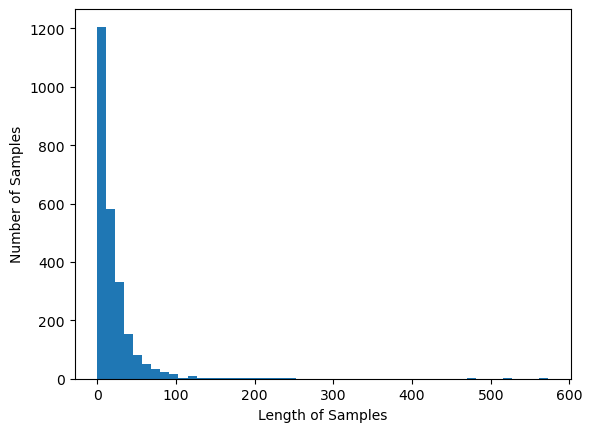

In [156]:
plt.hist([len(s) for s in data], bins =50)
plt.xlabel('Length of Samples')
plt.ylabel('Number of Samples')
plt.show()

* ÏµúÎåÄ Í∏∏Ïù¥Îäî 150ÏúºÎ°ú ÏÑ†ÌÉù

In [157]:
max_len = 150

## ÌïôÏäµ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨

In [158]:
from sklearn.model_selection import train_test_split

y = df['target']
x_train, x_test, y_train, y_test = train_test_split(data,y,test_size=0.30,random_state=2022)
# print(x_train.shape)
# print(x_test.shape)
y_train[:10]

/var/folders/m3/9rlp04l902592zqcywkn5ppm0000gn/T/ipykernel_39606/2846089119.py:7: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_train[:10]


328     1
234     1
511     1
799     1
15      1
1336    1
955     1
1646    1
1660    1
2919    1
Name: target, dtype: int64

## Î™®Îç∏ÎßÅ Î∞è ÌïôÏäµ
* LSTM ÏÇ¨Ïö©

In [159]:
from tensorflow.keras.layers import Embedding, Dense, LSTM, Bidirectional, GRU
from tensorflow.keras.models import Sequential

In [160]:
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)
print(x_train.shape, x_test.shape)

(1765, 150) (757, 150)


In [161]:
# Bidirectional LSTM
model1 = Sequential()
model1.add(Embedding(vocab_size, 100))
model1.add(Bidirectional(LSTM(128)))
model1.add(Dense(2, activation='softmax'))

model1.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])
model1.summary()

# GRU
# model2 = Sequential()
# model2.add(Embedding(vocab_size, 100))
# model2.add(GRU(128))
# model2.add(Dense(1, activation='sigmoid'))
# model2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
# model2.summary()

# LSTM
# model3 = Sequential()
# model3.add(Embedding(vocab_size, 128))
# model3.add(LSTM(128, dropout=0.2))
# model3.add(Dense(1, activation='sigmoid'))
# model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
# model3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, None, 100)         226100    
                                                                 
 bidirectional_3 (Bidirectio  (None, 256)              234496    
 nal)                                                            
                                                                 
 dense_6 (Dense)             (None, 2)                 514       
                                                                 
Total params: 461,110
Trainable params: 461,110
Non-trainable params: 0
_________________________________________________________________


In [162]:
history = model1.fit(x_train, y_train, epochs=10, batch_size=10, validation_split=0.1)

/opt/homebrew/anaconda3/envs/tf/lib/python3.9/site-packages/keras/engine/data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


Epoch 1/10


2022-11-28 22:18:20.040055: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-28 22:18:20.660588: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-28 22:18:20.697202: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-28 22:18:21.626776: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-28 22:18:21.683641: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


159/159 [==============================] - ETA: 0s - loss: 0.5881 - acc: 0.7040

2022-11-28 22:18:49.370950: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-28 22:18:49.550231: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-28 22:18:49.584811: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


159/159 [==============================] - 37s 180ms/step - loss: 0.5881 - acc: 0.7040 - val_loss: 0.4407 - val_acc: 0.8249
Epoch 2/10
159/159 [==============================] - 22s 137ms/step - loss: 0.3776 - acc: 0.8344 - val_loss: 0.4048 - val_acc: 0.8418
Epoch 3/10
159/159 [==============================] - 18s 116ms/step - loss: 0.2824 - acc: 0.8873 - val_loss: 0.4031 - val_acc: 0.8362
Epoch 4/10
159/159 [==============================] - 18s 114ms/step - loss: 0.2323 - acc: 0.9030 - val_loss: 0.5022 - val_acc: 0.8192
Epoch 5/10
159/159 [==============================] - 20s 122ms/step - loss: 0.1915 - acc: 0.9257 - val_loss: 0.5171 - val_acc: 0.8588
Epoch 6/10
159/159 [==============================] - 24s 152ms/step - loss: 0.1736 - acc: 0.9332 - val_loss: 0.4881 - val_acc: 0.8418
Epoch 7/10
159/159 [==============================] - 20s 127ms/step - loss: 0.1591 - acc: 0.9402 - val_loss: 0.4912 - val_acc: 0.8305
Epoch 8/10
159/159 [==============================] - 18s 113ms/st

In [163]:
model1.evaluate(x_test, y_test)

24/24 [==============================] - 3s 93ms/step - loss: 0.6809 - acc: 0.7979


[0.680884599685669, 0.7978864312171936]

## ÏãúÍ∞ÅÌôî

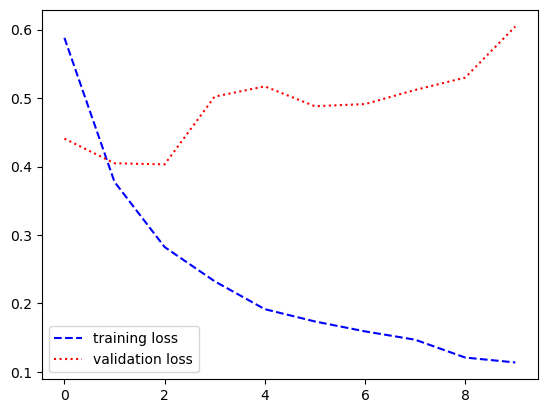

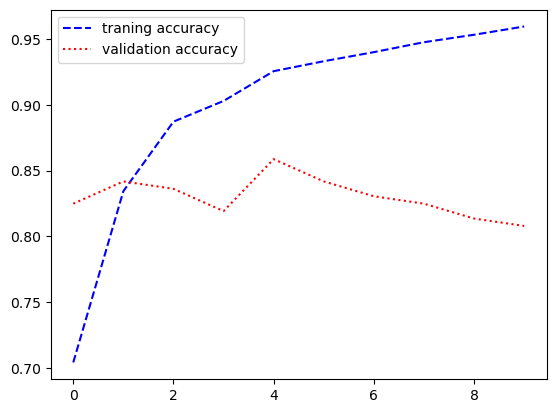

In [164]:
hist_dict = history.history
loss = hist_dict['loss']
val_loss = hist_dict['val_loss']
acc = hist_dict['acc']
val_acc = hist_dict['val_acc']

plt.plot(loss, 'b--', label='training loss')
plt.plot(val_loss, 'r:',label='validation loss')
plt.legend()

plt.figure()
plt.plot(acc, 'b--', label='traning accuracy')
plt.plot(val_acc, 'r:', label='validation accuracy')
plt.legend()

plt.show()

In [165]:
def sentiment_predict(new_sentence):
    temp_X = okt.morphs(new_sentence, stem=True) # ÌÜ†ÌÅ∞Ìôî
    new_token = [word for word in temp_X if not word in stopwords] # Î∂àÏö©Ïñ¥ Ï†úÍ±∞
    new_sequences = tokenizer.texts_to_sequences([new_token])
    new_pad = pad_sequences(new_sequences, maxlen = max_len)
    score = model1.predict(new_pad)

    if score[0][1] > score[0][0]:
        print(f'{new_sentence}->Í∏çÏ†ï')
        return 1
    else:
        print(f'{new_sentence}->Î∂ÄÏ†ï')
        return 0

In [166]:
# Í∞êÏÑ±Î∂ÑÏÑù ÏòàÏãú
sentiment_predict('ÏùåÏãùÎèÑ ÎßõÏóÜÍ≥† ÏßÅÏõêÎèÑ Î∂àÏπúÏ†àÌï¥Ïöî')
sentiment_predict('Ï£ºÎ∞©Ïû•ÎãòÏù¥ ÏóÑÏ≤≠ ÏπúÏ†àÌï¥Ïöî')
sentiment_predict('ÏÑúÎπÑÏä§ÎÇò ÎßõÏù¥ Îã§ Î≥ÑÎ°úÏóêÏöî')
sentiment_predict('Ïö∞Î¶¨ ÏóÑÎßàÍ∞Ä Ìï¥Ï§Ä Í≤ÉÎ≥¥Îã§ ÎÇòÏùÄÎìØ')
sentiment_predict('Ïó¨Í∏∞ Ï¢Ä Ïã¨Í∞ÅÌï©ÎãàÎã§')
sentiment_predict('Ïñë Ïã§ÌôîÎÉê')
sentiment_predict('ÏßÅÏõêÏù¥ ÎØ∏ÏπúÎìØ')
sentiment_predict('Ìïò.. Í∑∏ÎÉ• Ìï†ÎßêÏù¥ ÏóÜÏùå Ï†ÑÏ≤¥Ï†ÅÏúºÎ°ú Ïôú Í∑∏ Î™®ÏñëÏù∏ÏßÄ Î™®Î•¥Í≤†Ïùå')
sentiment_predict('ÏôÄ ÎåÄÎ∞ï Î∂ÄÎ™®Îãò Î™®ÏãúÍ≥† Ïã∂ÏùÄ Îßõ')
sentiment_predict('Îã¥Ïóê Îòê ÏôÄÏïºÏßÄ')
sentiment_predict('ÎÇòÏÅòÏßÄ ÏïäÏïòÏùå Îã§Ïùå Î≤àÏóê Í∞ÄÎ©¥ Îã§Î•∏ Î©îÎâ¥ Î®πÏùÑ ÏòàÏ†ï')
sentiment_predict('ÏßÑÏßú Ïì∞Î†àÍ∏∞')
sentiment_predict('Í∞úÏì∞Î†àÍ∏∞ Í∞ôÏùÄ Îßõ Í±ç Ïû•ÏÇ¨ Ï†ëÏñ¥Îùº')

2022-11-28 22:21:53.836342: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-28 22:21:54.052241: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-28 22:21:54.088186: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step
ÏùåÏãùÎèÑ ÎßõÏóÜÍ≥† ÏßÅÏõêÎèÑ Î∂àÏπúÏ†àÌï¥Ïöî->Î∂ÄÏ†ï
1/1 [==============================] - 0s 346ms/step
Ï£ºÎ∞©Ïû•ÎãòÏù¥ ÏóÑÏ≤≠ ÏπúÏ†àÌï¥Ïöî->Í∏çÏ†ï
1/1 [==============================] - 1s 722ms/step
ÏÑúÎπÑÏä§ÎÇò ÎßõÏù¥ Îã§ Î≥ÑÎ°úÏóêÏöî->Î∂ÄÏ†ï
1/1 [==============================] - 0s 160ms/step
Ïö∞Î¶¨ ÏóÑÎßàÍ∞Ä Ìï¥Ï§Ä Í≤ÉÎ≥¥Îã§ ÎÇòÏùÄÎìØ->Î∂ÄÏ†ï
1/1 [==============================] - 0s 82ms/step
Ïó¨Í∏∞ Ï¢Ä Ïã¨Í∞ÅÌï©ÎãàÎã§->Î∂ÄÏ†ï
1/1 [==============================] - 0s 130ms/step
Ïñë Ïã§ÌôîÎÉê->Î∂ÄÏ†ï
1/1 [==============================] - 0s 99ms/step
ÏßÅÏõêÏù¥ ÎØ∏ÏπúÎìØ->Î∂ÄÏ†ï
1/1 [==============================] - 0s 140ms/step
Ìïò.. Í∑∏ÎÉ• Ìï†ÎßêÏù¥ ÏóÜÏùå Ï†ÑÏ≤¥Ï†ÅÏúºÎ°ú Ïôú Í∑∏ Î™®ÏñëÏù∏ÏßÄ Î™®Î•¥Í≤†Ïùå->Î∂ÄÏ†ï
1/1 [==============================] - 0s 92ms/step
ÏôÄ ÎåÄÎ∞ï Î∂ÄÎ™®Îãò Î™®ÏãúÍ≥† Ïã∂ÏùÄ Îßõ->Í∏çÏ†ï
1/1 [==============================] - 0s 86ms/step
Îã¥Ïóê Îòê ÏôÄÏïºÏßÄ->Í∏çÏ†ï
1/1 [=========================

0

In [167]:
restaurant_df = pd.read_csv('./ÌôçÎåÄ_ÎßõÏßë_Î¶¨Î∑∞_Îç∞Ïù¥ÌÑ∞_ÌîºÏò§Îãà.csv')
comment_data = restaurant_df['comment']
name = 'ÌîºÏò§Îãà'
score = 3.8

In [168]:
# ÏãùÎãπ ÌèâÍ∞Ä
def restaurant_evaluation(comment_data, name, score):
    comment_data = comment_data.dropna()
    comment_data = comment_data.str.replace("[^„Ñ±-Ìïò-„Ö£Í∞Ä-Ìû£ ]", '')
    comment_data = comment_data.replace('', np.nan)
    comment_data = comment_data.dropna()

    data_list = comment_data.tolist()

    total_score = 0
    
    for data in data_list:
        result = sentiment_predict(data)
        if result == 1:
            total_score += 1


    print(f'{name}Ïùò Ïã§Ï†ú ÌèâÏ†ê:  {score}\n{name}Ïùò Î™®Îç∏ ÌèâÏ†ê: ', total_score / len(data_list) * 5)

In [169]:
restaurant_evaluation(comment_data,name, score)

1/1 [==============================] - 0s 74ms/step


/var/folders/m3/9rlp04l902592zqcywkn5ppm0000gn/T/ipykernel_39606/2011833978.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  comment_data = comment_data.str.replace("[^„Ñ±-Ìïò-„Ö£Í∞Ä-Ìû£ ]", '')


Ï≤òÏùå Îî∏Í∏∞ÏºÄÏù¥ÌÅ¨Î®πÏóàÏùÑÎïå Ï∂©Í≤©Ïù¥ ÏïÑÏßÅÎèÑ Í∏∞ÏñµÎÇòÏöî ÏßÄÍ∏àÎèÑ Ïó¨Ï†ÑÌûà ÎßõÏûàÎÑ§Ïöî->Í∏çÏ†ï
1/1 [==============================] - 0s 80ms/step
Ï°¥Îßõ Í∞úÏ∂î->Í∏çÏ†ï
1/1 [==============================] - 0s 77ms/step
Ïó≠Ïãú Îî∏Í∏∞Îäî Îã§ Ïò≥ÏïÑ Îî∏Í∏∞ÏºÄÏù¥ÌÅ¨ ÏµúÍ≥†Î°ú ÎßõÏûàÏñ¥Ïöî->Í∏çÏ†ï
1/1 [==============================] - 0s 67ms/step
Îî∏Í∏∞ ÎÑò Ï¢ãÏïÑÏöî ÎßõÏûàÏñ¥Ïöî ÏÇ¨Ïû•Îãò ÏπúÏ†àÌïòÏÖîÏÑú Ï¢ãÏïòÏñ¥Ïöî->Í∏çÏ†ï
1/1 [==============================] - 0s 67ms/step
Îî∏Í∏∞ÏºÄÏù¥ÌÅ¨Îûë Ïª§ÌîºÍ∞Ä Î¨¥ÎÇúÌï® ÌïúÏãúÍ∞Ñ Î®πÍ≥† ÎÇòÏò§Í∏∞ Ï¢ãÏùå->Í∏çÏ†ï
1/1 [==============================] - 0s 66ms/step
Î¨¥ÎÇúÌïú ÏºÄÏù¥ÌÅ¨Îßõ Í∞úÌïµÏ°¥ÎßõÍπåÏßÑ ÏïÑÎãò->Î∂ÄÏ†ï
1/1 [==============================] - 0s 67ms/step
ÎÑàÎ¨¥ ÎßõÏûàÍ≥† Ï†úÍ∞Ä Í∞úÏù∏Ï†ÅÏúºÎ°ú Îã® ÎîîÏ†ÄÌä∏Î•º Ïã´Ïñ¥ÌïòÎäîÎç∞ Ï¥àÏΩî ÏºÄÏù¥ÌÅ¨Ïù∏Îç∞ÎèÑ Ïïà Îã¨Í≥† ÎßõÏûàÏóàÏñ¥Ïöî „Ö†„Ö†Î¨¥ÏóáÎ≥¥Îã§ Ïª§ÌîºÎ®πÎã§Í∞Ä Îã§ ÌùòÎ†∏ÎäîÎç∞ „Ö†„Ö† ÏôÄÏÑú ÏßÅÏ†ë Îã¶ÏïÑÏ£ºÏãúÍ≥†„Ö†„Ö† ÏÉàÎ°≠Í≤å Î¶¨ÌïÑÌï¥Ï£ºÏã¨ Í∞êÏÇ¨Ìï¥Ïöî „Ö†